# TASK 3 - Boston House Prediction

### About the dataset

> Attribute Information
> Input features in order:
- 1) CRIM: per capita crime rate by town
- 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- 3) INDUS: proportion of non-retail business acres per town
- 4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
- 6) RM: average number of rooms per dwelling
- 7) AGE: proportion of owner-occupied units built prior to 1940
- 8) DIS: weighted distances to five Boston employment centres
- 9) RAD: index of accessibility to radial highways
- 10) TAX: full-value property-tax rate per 10,000 dollars [dollars/10k]
- 11) PTRATIO: pupil-teacher ratio by town
- 12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- 13) LSTAT: % lower status of the population

> Output variable:
- 14) MEDV: Median value of owner-occupied homes in 1000's dollars [k dollars]

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression

import warnings
warnings.resetwarnings()
warnings.simplefilter('ignore', FutureWarning)

C:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


> Data Preprocessing

In [2]:
data =  pd.read_csv('boston.csv')
print('size of train data is :', data.shape)

size of train data is : (506, 14)


In [3]:
df = data.copy()

In [4]:
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# remove any 'unnamed' column present in the dataset
#df.drop(df.filter(regex='Unname'), axis=1, inplace=True)

# Data Preparation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


`No missing values`

- Cardinality

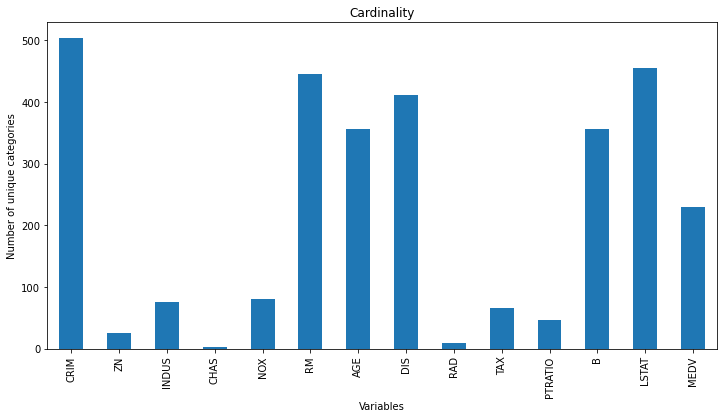

In [7]:
# Check low - high cardinality of numerical values
df.select_dtypes(['float', 'int']).nunique()

# plot of cardinality
df.nunique().plot.bar(figsize=(12, 6))
plt.xlabel('Variables')
plt.ylabel('Number of unique categories')
plt.title('Cardinality');

In [8]:
df.select_dtypes(['float', 'int']).nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

`CRIM`, `RM`, `DIS` and `LSTAT` have very high cardinalities, while the `CHAS` and `RAD` feature has very low cardinality. 

- Collinearity 

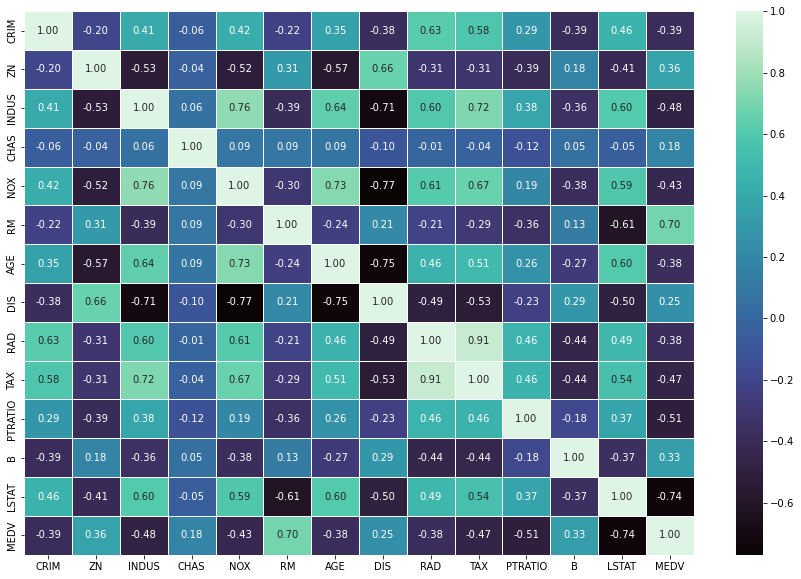

In [9]:
# check multicollinearity
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='mako', linewidths=0.8, fmt='.2f');

The `LSTAT` and `RM` featureS have a high correction to the target vector, furthermore most of the features are multicollinear.

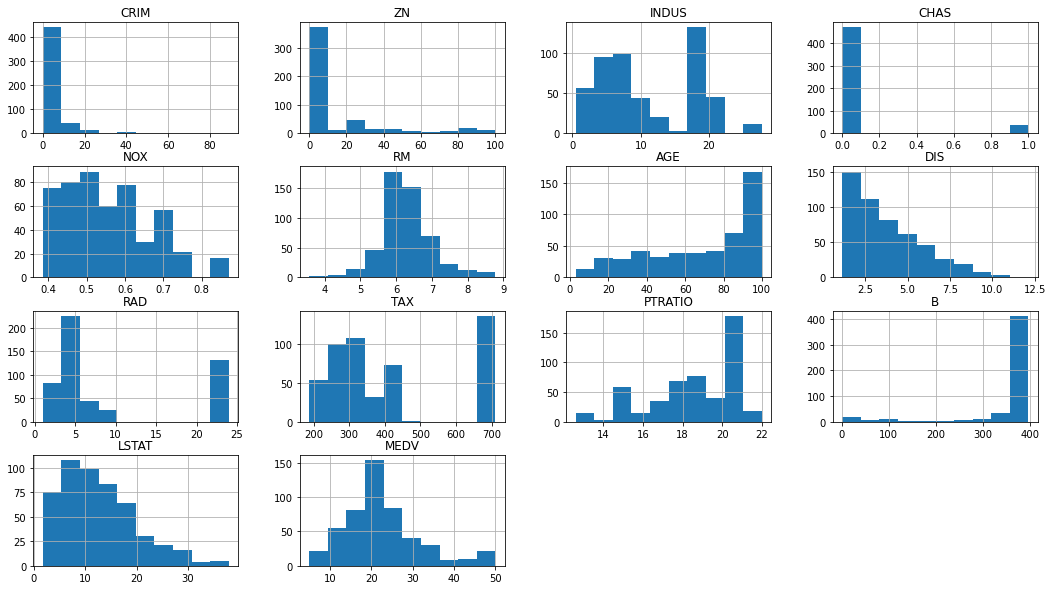

In [10]:
# The distribution of the data 
df.hist(figsize=(18,10));

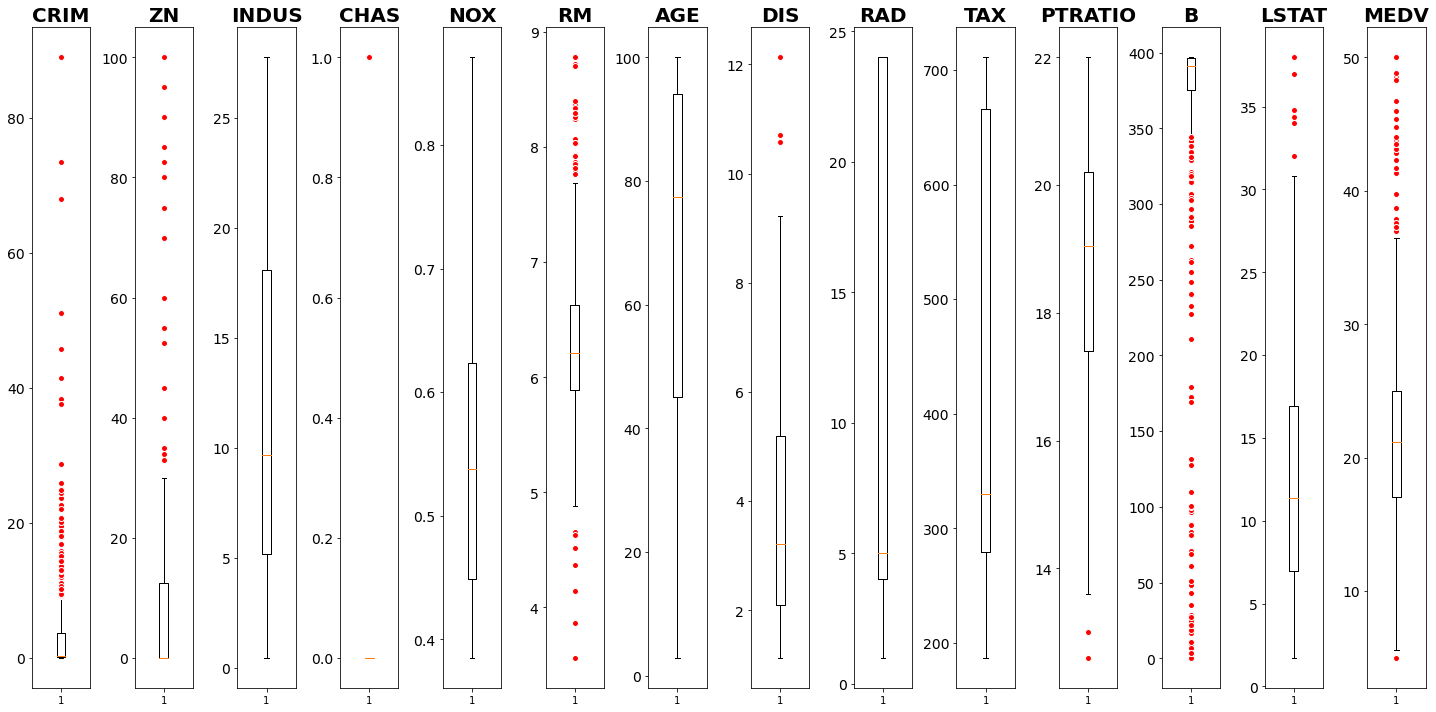

In [11]:
# box plot to check if data is skewed, understand the measure of spread and identify possible outliers

# create subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

# make subplots
fig, axs = plt.subplots(1,len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i],
              flierprops=red_circle)
    df.iloc[:,i]
    
    ax.set_title(df.columns[i],
            fontsize=20,
            fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout();

- The are some outliers present.

In [12]:
# Remove unnecessary columns
df.drop(columns=['CRIM', 'CHAS', 'NOX' ], axis=1, inplace=True)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


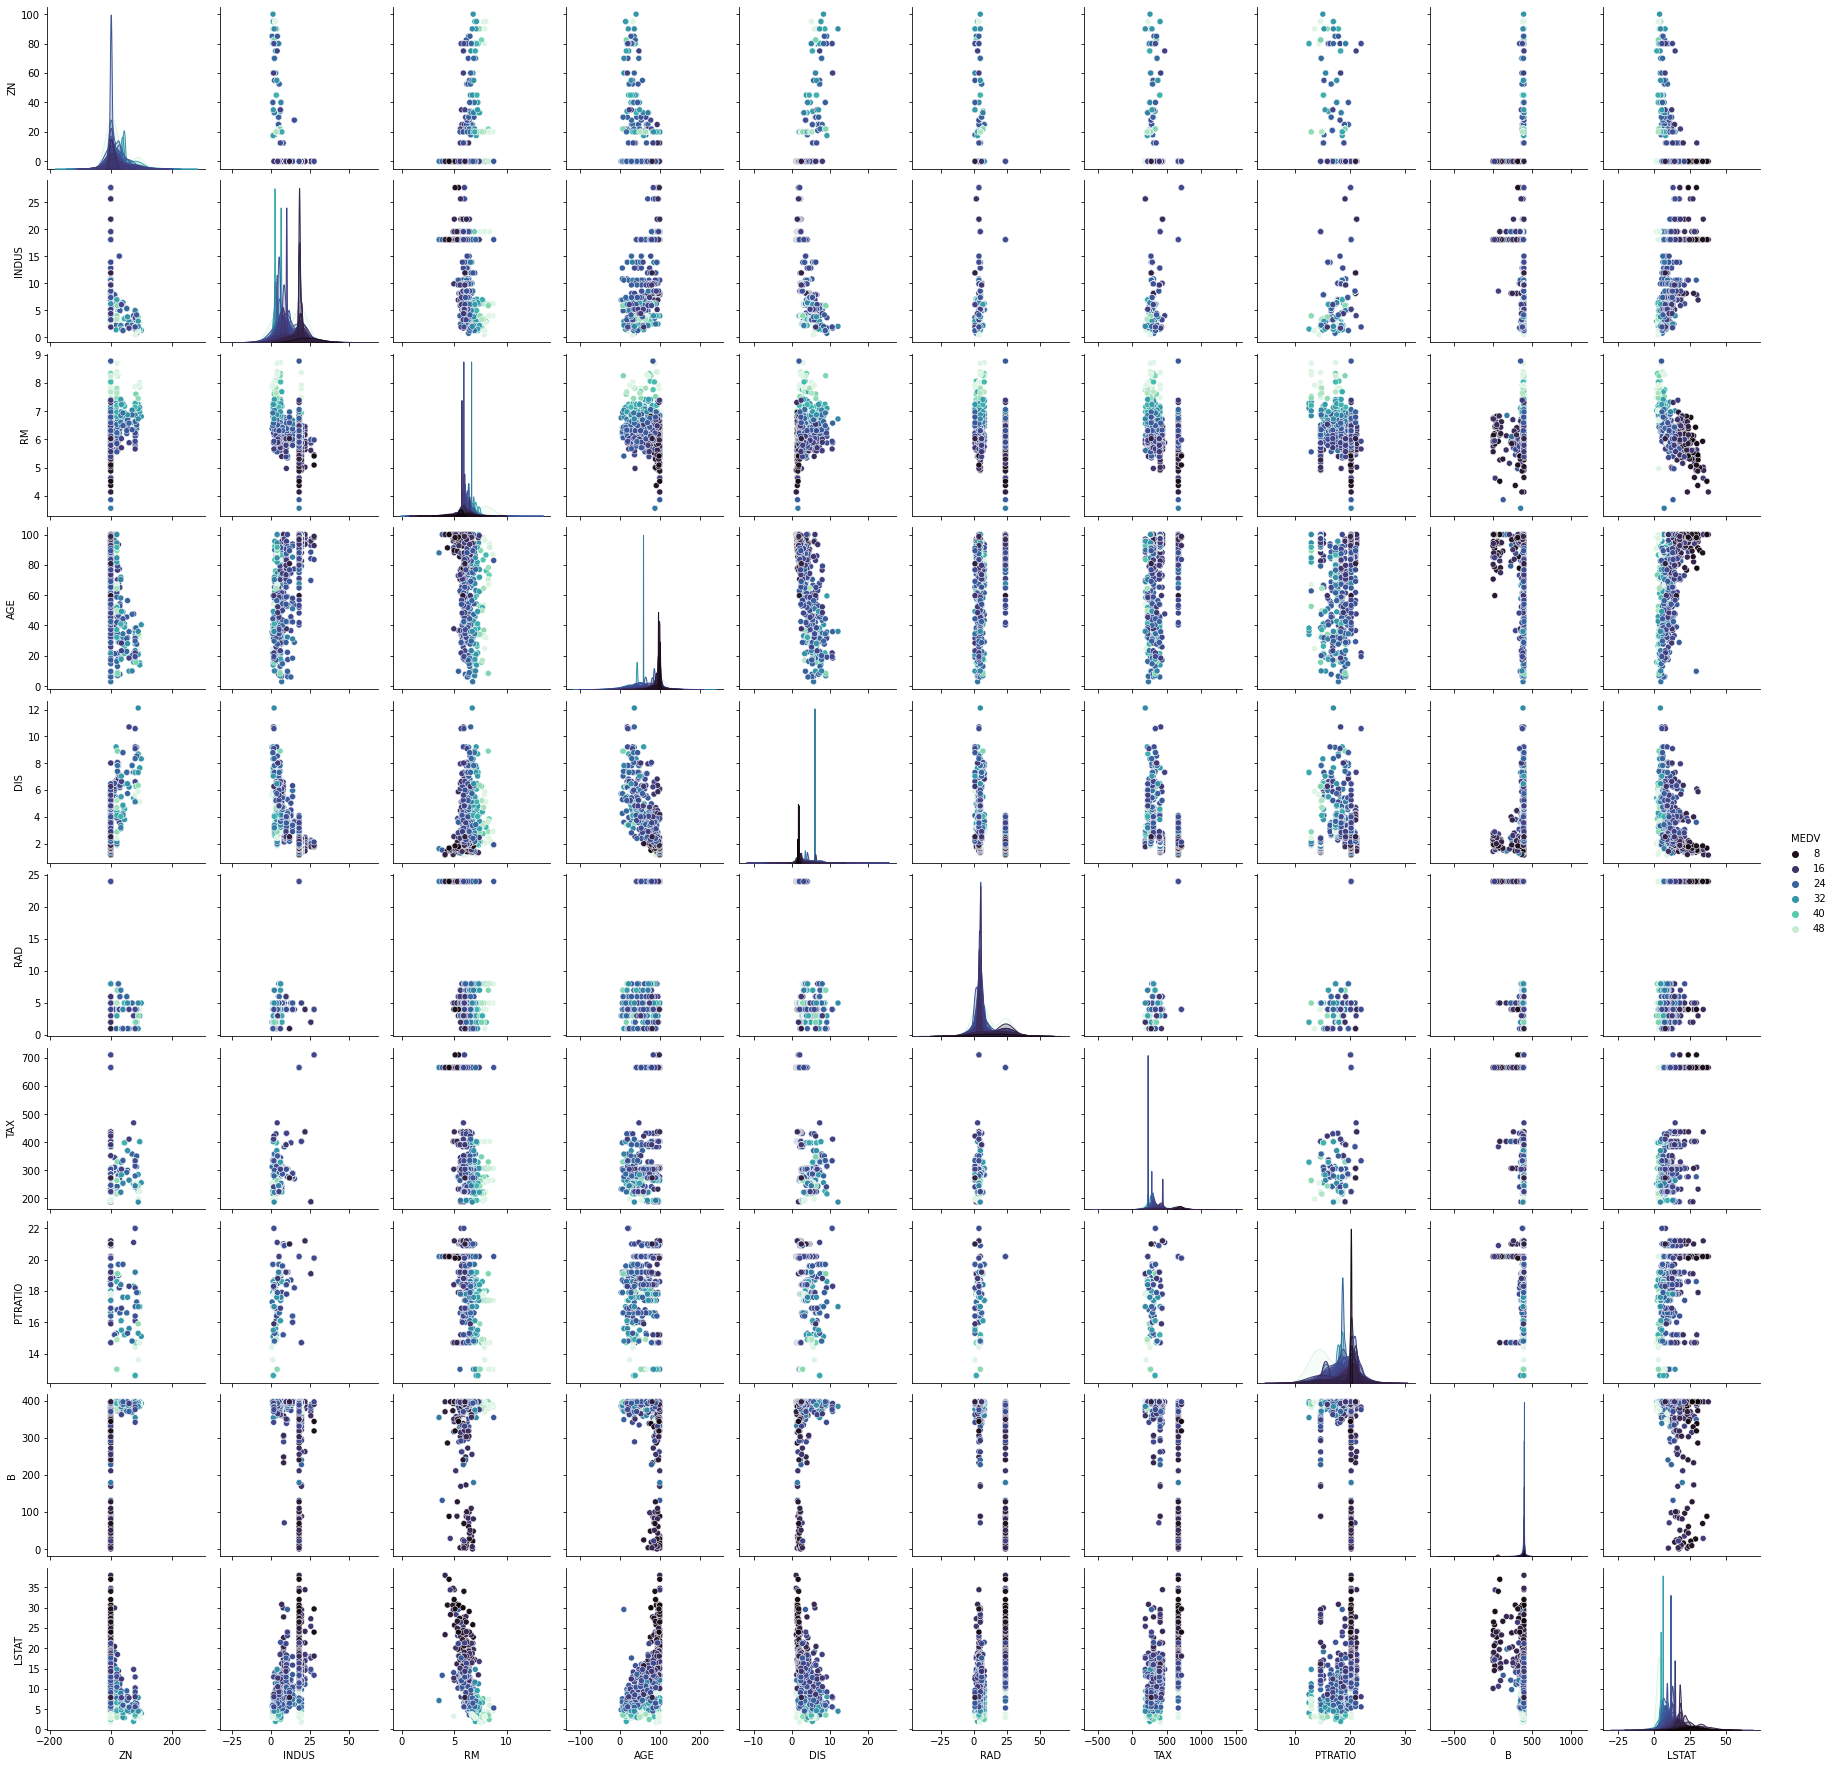

In [13]:
# pair plot to check feature and target relationship
sns.pairplot(df, hue='MEDV', palette='mako');

In [14]:
# statistical summary of columns with 
df.describe(include='all')

,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,11.136779,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,23.322453,6.860353,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.460000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.000000,5.190000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.000000,9.690000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,12.500000,18.100000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,100.000000,27.740000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- Model Building

In [15]:
# split the data

# create X (all the feature columns)
X = df.drop('MEDV', axis=1)

# create y (the target column)
y = df['MEDV']

In [16]:
X[:5]

,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.0,2.31,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.0,7.07,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.0,7.07,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.0,2.18,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.0,2.18,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [17]:
y[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

> Normalise the data

In [18]:
# Feature Scaling with StandardScaler
from sklearn.preprocessing import StandardScaler

# build the scaler model
scaler = StandardScaler()

# Fit using train set
scaler.fit(X);

# transform X 
X_scaled = scaler.transform(X)

C:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [19]:
# verify min values of all features
X_scaled.min(axis=0)

array([-0.48772236, -1.55784179, -3.88024936, -2.33543704, -1.26706919,
       -0.98284286, -1.31399004, -2.70737911, -3.9071933 , -1.5311271 ])

In [20]:
# verify max values of all features
X_scaled.max(axis=0)

array([3.80423444, 2.42256516, 3.55504427, 1.11749449, 3.96051769,
       1.66124525, 1.79819419, 1.63882832, 0.44105193, 3.54877081])

In [21]:
# split into train and test
from sklearn.model_selection import train_test_split

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                   y,
                                                   test_size=0.2)

In [22]:
# import the models
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
# put linear versions in a dictionary

models = {'Linear': LinearRegression(),
          'Ridge': Ridge(),
          'XGB': XGBRegressor()
         }

# create function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models
    models : a dict of different regression sklearn models
    X_train : training data , no labels
    X_test : testing data, no labels
    y_train : training labels
    y_test: test labels
    '''    
    # make a dict to keep model scores
    
    model_scores = {}
    
    # loop through models
    
    for name, model in models.items():
        # fit model to data
        model.fit(X_scaled, y)
        # Evaluate model and append score to model_score
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [24]:
model_scores = fit_and_score(models=models,
                            X_train=X_scaled,
                            X_test=X_test,
                            y_train=y,
                            y_test=y_test)
model_scores

{'Linear': 0.7330553783403821,
 'Ridge': 0.7328274714921286,
 'XGB': 0.9999536352479108}

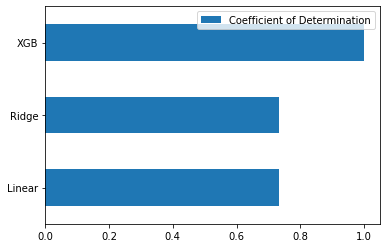

In [25]:
# visualizing the models performance
model_compare = pd.DataFrame(model_scores, index=['Coefficient of Determination'])
model_compare.T.plot.barh();

> At a score of 0.99 XGBRegressor outperforms LinearRegression and RIDGE, however the r2 score is not good enough indicator of the ideal model the error will also be checked.

In [26]:
# make function to evaluate
def evaluate_preds(y_true, y_preds):
    """
    Function performs evaluation comparison on y_true labels vs y_preds,
    on our regression model
    """
    r2 = r2_score(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    
    metric_dict = {'r2_score': r2_score,
                   'mean_absolute_error' : mean_absolute_error,
                   'mean_squared_error' : mean_squared_error
                  }
    print(f'r2 score: {r2:.2f}')
    print(f'mean absolute error: {mae:.3f}')    
    print(f'mean squared errror: {mse:.4f}')   
    
    return metric_dict

> Training

In [27]:
xgb = XGBRegressor().fit(X_scaled, y)

In [28]:
train_preds = xgb.predict(X_train)

In [29]:
xgb_y_preds = xgb.predict(X_test)

In [30]:
mae_train_score = metrics.mean_absolute_error(y_train, train_preds)
print(mae_train_score)

0.04198267294628789


In [31]:
train_preds[:5], xgb_y_preds[:5]

(array([50.01235 , 23.195572, 17.267563, 21.158512, 24.07149 ],
       dtype=float32),
 array([16.423168, 23.95397 , 13.19698 , 21.20812 , 11.999673],
       dtype=float32))

- Evaluation

In [32]:
mae_train_score = metrics.mean_absolute_error(y_train, train_preds)
print(mae_train_score)

0.04198267294628789


In [33]:
# evaluate predictions
xgb_y_metrics = evaluate_preds(y_test, xgb_y_preds)

r2 score: 1.00
mean absolute error: 0.042
mean squared errror: 0.0043


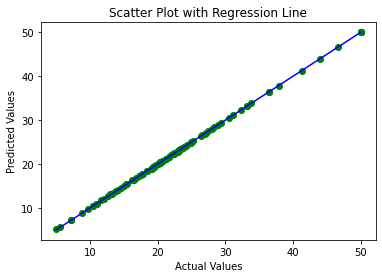

In [34]:
# Scatter plot of y_test vs xgb_y_preds
plt.scatter(y_test, xgb_y_preds, color='green')

# Regression line
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, xgb_y_preds, 1))(np.unique(y_test)), color='blue')

# Title and labels
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values');


- The XGB model seems to be overfitting.

In [35]:
ridge = Ridge().fit(X_scaled, y)
train_preds = ridge.predict(X_train)
ridge_y_preds = ridge.predict(X_test)

In [36]:
mae_train_score = metrics.mean_absolute_error(y_train, train_preds)
print(mae_train_score)

3.343742060952137


In [37]:
# evaluate predictions
ridge_y_metrics = evaluate_preds(y_test, ridge_y_preds)

r2 score: 0.73
mean absolute error: 3.384
mean squared errror: 24.7066


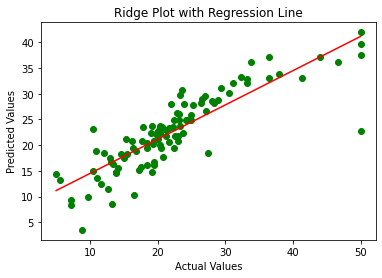

In [38]:
# Scatter plot of y_test vs ridge_y_preds
plt.scatter(y_test, ridge_y_preds, color='green')

# Regression line
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, ridge_y_preds, 1))(np.unique(y_test)), color='red')

# Title and labels
plt.title('Ridge Plot with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values');

- The Ridge model needs a bit of hyperperameter tuning, however the line does fit the plot.